<a href="https://colab.research.google.com/github/csteele/nlp-disasters/blob/emma/nlp_disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real or Not? NLP with Disaster Tweets
Twitter has become an important communication channel in times of emergency.The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. In this competition you are given tweet data, some keywords and a location of the tweet and with this data the aim is to predict if the tweet is referencing a real disaster. 

*Link:* https://www.kaggle.com/c/nlp-getting-started




## What is this notebook?
It is a colloborative environment to share your code and progress with the team. There are a variety of ways to contribute:
 
1. Research NLP methods that we can try to include
2. Visulise and exploratore the data analysis to find trends and useful features
3. Build NLP models so that we can compare approaches and methods

## How to get started?
See this section for instructions on how to join kaggle and get your API key, how to version control, and how to use colabs.

**Step (1)** - Go to Kaggle and download your API key. This will be used to download the Kaggle dataset and manipulate it within your Colab environment.
![alt text](https://docs.google.com/uc?export=download&id=1gFbQABK3YlaHdI-u4hQ2emtuVtbQz_71)

**Step (2)** - Sign up to GitHub ([here](https://github.com)). This will be used to version control and share your work with the team. 

There is a master branch (notebook) that has the teams changes.  However, as we make our individual changes we will do it under a branch in our own name - these changes will not be visible in the master notebook. You can save in your own branch and when you are ready you can merge/copy those changes to the master branch for everyone to see. 

# Setup and Load Data  (Changed)
In this section we will set up and load the data.  The below section allows you to upload your personal kaggle API file that you downloaded in Setup Step (1). 

In [1]:
from google.colab import files
files.upload() #upload kaggle api key
!mkdir -p ~/.kaggle #create directory
!cp kaggle.json ~/.kaggle/ #copy uploaded file to new directory

Saving kaggle.json to kaggle.json


Now that we have our API key ready to use the next step downloads the training data and displays it. 

In [3]:
!kaggle competitions download -f train.csv --competition nlp-getting-started #download train.csv from compettition
import pandas as pd
train = pd.read_csv('train.csv')
train.head(5)

train.csv: Skipping, found more recently modified local copy (use --force to force download)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Imports

In [0]:
import plotly.express as px ## used for interactive plots


#Exploratory Data Analysis
In this section we can explore the data to answer questions that help us understand what the data contains and how it could be used to predict an actual disaster vs fake news / exagerations. 

## Data Quality

In [6]:
train_n = train.shape[0]
train_rate=train['target'].mean()
string = 'The training data contains {} samples with {}% tweets about real disasters.'
print(string.format(train_n,round(train_rate*100,2)))


The training data contains 7613 samples with 42.97% tweets about real disasters.


In [0]:
print('Data completeness per column')
train.count() / train_n


Data completeness per column


id          1.000000
keyword     0.991987
location    0.667280
text        1.000000
target      1.000000
dtype: float64

## Data Exploration


### Do some locations have a higher proportion of disasters?

In [7]:
location_filter = 10

location=train.groupby('location').agg(['mean','count'])['target'].reset_index()
location=location.loc[location['count']>location_filter].sort_values(by='mean',ascending=False).head(25)
px.bar(location,x='location',y='mean', hover_data=["location","mean","count"])

**Key Word Frequency**

In [39]:
train.keyword.nunique()
df = train.groupby('keyword')['id'].nunique()
print(df)

keyword
ablaze                 36
accident               35
aftershock             34
airplane%20accident    35
ambulance              38
                       ..
wounded                37
wounds                 33
wreck                  37
wreckage               39
wrecked                39
Name: id, Length: 221, dtype: int64


nan:61
ablaze:36
accident:35
aftershock:34
airplane%20accident:35
ambulance:38
annihilated:34
annihilation:29
apocalypse:32
armageddon:42
army:34
arson:32
arsonist:34
attack:36
attacked:35
avalanche:30
battle:26
bioterror:37
bioterrorism:30
blaze:38
blazing:34
bleeding:35
blew%20up:33
blight:32
blizzard:37
blood:35
bloody:35
blown%20up:33
body%20bag:33
body%20bagging:33
body%20bags:41
bomb:34
bombed:38
bombing:29
bridge%20collapse:35
buildings%20burning:35
buildings%20on%20fire:33
burned:33
burning:34
burning%20buildings:37
bush%20fires:25
casualties:35
casualty:34
catastrophe:36
catastrophic:30
chemical%20emergency:33
cliff%20fall:36
collapse:34
collapsed:35
collide:34
collided:40
collision:39
crash:33
crashed:34
crush:37
crushed:31
curfew:37
cyclone:32
damage:41
danger:36
dead:30
death:36
deaths:38
debris:37
deluge:42
deluged:27
demolish:34
demolished:28
demolition:35
derail:35
derailed:38
derailment:39
desolate:29
desolation:36
destroy:37
destroyed:32
destruction:34
detonate:36
deto

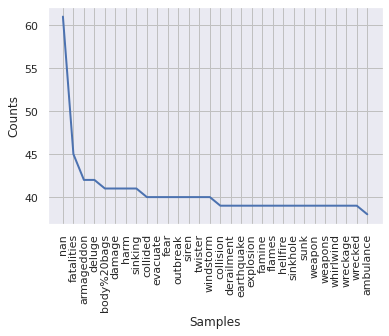

In [63]:
import nltk
freq = nltk.FreqDist(train.keyword)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(30, cumulative=False)

In [62]:
Keyword_Accuracy = []

for keyword in train:
  Keyword_Accuracy.append(keyword[2])

print(Keyword_Accuracy)

IndexError: ignored

# Research

## Bag of Words


# Model